In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
battes_df = pd.read_csv("Batsman_Data.csv")
bowler_df = pd.read_csv("Bowler_data.csv")
grnd_avg_df = pd.read_csv("Ground_Averages.csv")
odi_res_df = pd.read_csv("ODI_Match_Results.csv")
odi_tot_df = pd.read_csv("ODI_Match_Totals.csv")
wc_players_df = pd.read_csv("WC_players.csv")


battes_df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [5]:
wc_players_df.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [4]:
grnd_avg_df.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [6]:
odi_tot_df.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [7]:
odi_res_df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [8]:
common = set.intersection(set(odi_res_df['Start Date']), set(odi_tot_df['Start Date']))

In [9]:
df = pd.concat([
    odi_res_df[odi_res_df['Start Date']. isin(common)],
    odi_tot_df[odi_tot_df['Start Date']. isin(common)]]).sort_values(by='Start Date')

In [10]:
df.columns

Index(['Unnamed: 0', 'Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Country', 'Country_ID', 'Score',
       'Overs', 'RPO', 'Target', 'Inns'],
      dtype='object')

In [13]:
c = set.intersection(set(odi_res_df['Start Date']), set(odi_tot_df['Start Date']),set(battes_df['Start Date']), set(bowler_df['Start Date']))


bat_boll_res_tot = pd.concat([
    odi_res_df[odi_res_df['Start Date']. isin(c)],
    odi_tot_df[odi_tot_df['Start Date']. isin(c)],
    battes_df[battes_df['Start Date'].isin(c)],
    bowler_df[bowler_df['Start Date'].isin(c)]]).sort_values(by='Start Date')

In [14]:
bat_boll_res_tot.columns

Index(['Unnamed: 0', 'Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Country', 'Country_ID', 'Score',
       'Overs', 'RPO', 'Target', 'Inns', 'Bat1', 'Runs', 'BF', 'SR', '4s',
       '6s', 'Batsman', 'Player_ID', 'Mdns', 'Wkts', 'Econ', 'Ave', 'Bowler'],
      dtype='object')

In [15]:
bat_boll_res_tot

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,...,SR,4s,6s,Batsman,Player_ID,Mdns,Wkts,Econ,Ave,Bowler
9429,9430,NaN,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,...,69.56,2,0,Mashrafe Mortaza,56007.0,NaN,NaN,NaN,NaN,NaN
60,61,NaN,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,...,24.0,NaN,NaN,NaN,49619.0,0,2,4.75,19.00,Suranga Lakmal
1227,1228,NaN,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,...,75.00,1,0,Milinda Siriwardana,222354.0,NaN,NaN,NaN,NaN,NaN
8167,8168,NaN,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,...,100.00,0,0,Mustafizur Rahman,330902.0,NaN,NaN,NaN,NaN,NaN
9031,9032,NaN,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,...,66.66,1,0,Tamim Iqbal,56194.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,3123,NaN,NaN,NaN,NaN,NaN,v Australia,Port Elizabeth,9 Oct 2016,ODI # 3792,...,-,NaN,NaN,NaN,44828.0,-,-,-,-,Faf du Plessis
2346,2347,NaN,NaN,NaN,NaN,NaN,v Australia,Port Elizabeth,9 Oct 2016,ODI # 3792,...,42.0,NaN,NaN,NaN,327830.0,1,1,4.71,33.00,Dwaine Pretorius
6997,6998,NaN,NaN,NaN,NaN,NaN,v Bangladesh,Dhaka,9 Oct 2016,ODI # 3793,...,77.77,1,0,Chris Woakes,247235.0,NaN,NaN,NaN,NaN,NaN
3122,3123,NaN,NaN,NaN,NaN,NaN,v Australia,Port Elizabeth,9 Oct 2016,ODI # 3792,...,79.31,8,0,Faf du Plessis,44828.0,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2597 non-null   int64  
 1   Result      2597 non-null   object 
 2   Margin      1301 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1301 non-null   object 
 5   Bat         1301 non-null   object 
 6   Opposition  2597 non-null   object 
 7   Ground      2597 non-null   object 
 8   Start Date  2597 non-null   object 
 9   Match_ID    2597 non-null   object 
 10  Country     2597 non-null   object 
 11  Country_ID  2597 non-null   int64  
 12  Score       1296 non-null   object 
 13  Overs       1296 non-null   float64
 14  RPO         1296 non-null   object 
 15  Target      620 non-null    float64
 16  Inns        1296 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 365.2+ KB


In [17]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2597 non-null   int64         
 1   Result      2597 non-null   object        
 2   Margin      1301 non-null   object        
 3   BR          606 non-null    float64       
 4   Toss        1301 non-null   object        
 5   Bat         1301 non-null   object        
 6   Opposition  2597 non-null   object        
 7   Ground      2597 non-null   object        
 8   Start Date  2597 non-null   datetime64[ns]
 9   Match_ID    2597 non-null   object        
 10  Country     2597 non-null   object        
 11  Country_ID  2597 non-null   int64         
 12  Score       1296 non-null   object        
 13  Overs       1296 non-null   float64       
 14  RPO         1296 non-null   object        
 15  Target      620 non-null    float64       
 16  Inns        1296 non-nu

In [19]:
res_toss = df[['Result','Toss','Opposition','Ground']]

In [20]:
res_toss

,Result,Toss,Opposition,Ground
891,won,lost,v Bangladesh,Colombo (SSC)
892,lost,won,v Sri Lanka,Colombo (SSC)
870,lost,NaN,v Sri Lanka,Colombo (SSC)
869,won,NaN,v Bangladesh,Colombo (SSC)
148,won,won,v Zimbabwe,Bulawayo
...,...,...,...,...
770,won,NaN,v Australia,Port Elizabeth
771,lost,NaN,v South Africa,Port Elizabeth
772,lost,NaN,v Bangladesh,Dhaka
773,won,NaN,v England,Dhaka


In [21]:
res_toss.isna().sum()

Result           0
Toss          1296
Opposition       0
Ground           0
dtype: int64

In [22]:
res_toss.dropna()

,Result,Toss,Opposition,Ground
891,won,lost,v Bangladesh,Colombo (SSC)
892,lost,won,v Sri Lanka,Colombo (SSC)
148,won,won,v Zimbabwe,Bulawayo
1135,lost,won,v South Africa,Dambulla
1136,won,lost,v Sri Lanka,Dambulla
...,...,...,...,...
1202,won,lost,v New Zealand,Abu Dhabi
792,lost,won,v Bangladesh,Dhaka
793,won,lost,v England,Dhaka
791,lost,won,v South Africa,Port Elizabeth


In [24]:
# we are playing in the england  so we will analyse only england grounds
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]


In [25]:
# Total Grounds

wc_ground_state = []
ODI_grounds = odi_res_df.Ground

for grnd in ODI_grounds:
    for grnds in WC_venue_pitches:
        if grnd in grnds:
            wc_ground_state.append((grnd,grnds))



In [26]:
Ground_names = dict(set(wc_ground_state))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Birmingham': 'Edgbaston, Birmingham',
 'Nottingham': 'Trent Bridge, Nottingham',
 "Lord's": "Lord's, London",
 'The Oval': 'The Oval, London',
 'Leeds': 'Headingley, Leeds',
 'Manchester': 'Old Trafford, Manchester',
 'Southampton': 'Rose Bowl, Southampton',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Bristol': 'County Ground, Bristol'}

In [27]:
#Let's gather the data of all ODI's in these WC Venues
WC_Grounds_History = odi_res_df[odi_res_df.Ground.isin([Ground[0] for Ground in wc_ground_state])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
75,566,won,5 wickets,19.0,won,2nd,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
76,860,lost,5 wickets,19.0,lost,1st,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
77,567,won,86 runs,NaN,won,1st,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
78,861,lost,86 runs,NaN,lost,2nd,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
79,568,lost,34 runs,NaN,won,2nd,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Pakistan'),
  Text(4, 0, 'SriLanka'),
  Text(5, 0, 'Newzealad'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'WestIndies'),
  Text(8, 0, 'Bangladesh')])

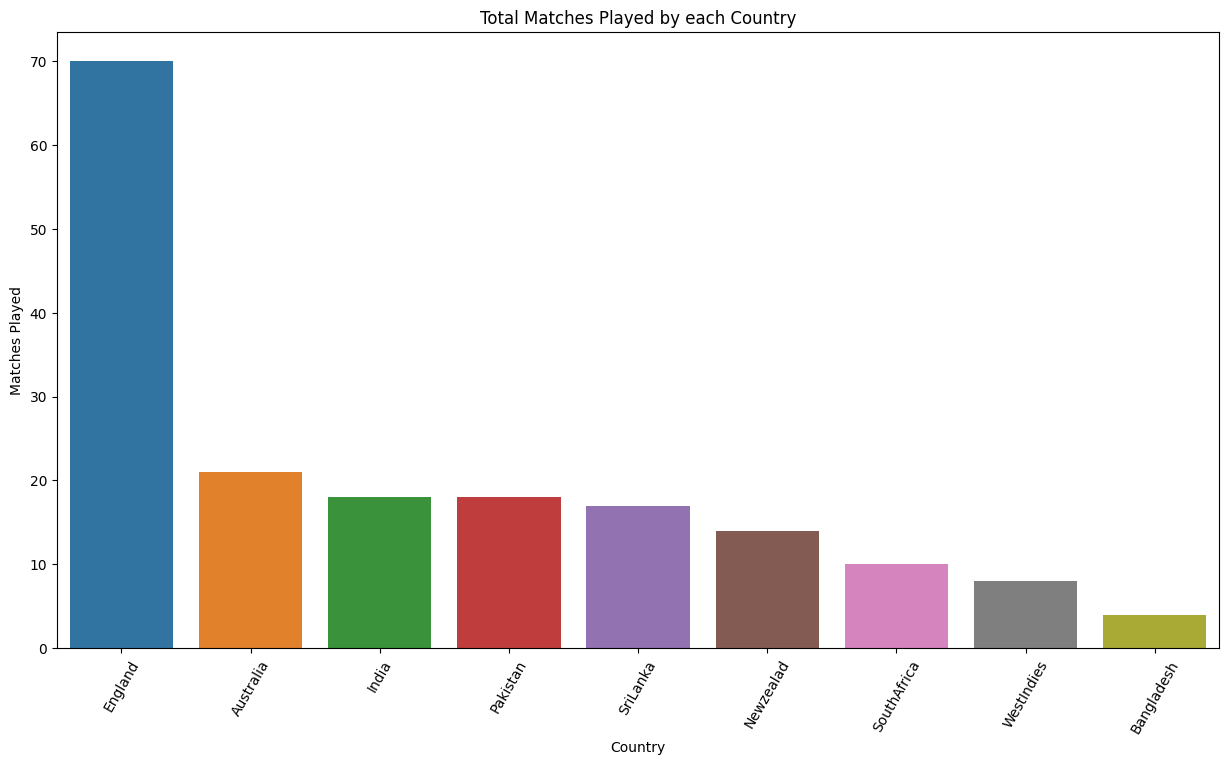

In [28]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

In [29]:
WC_Grounds_History.sample(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
900,951,won,85 runs,NaN,lost,1st,v Ireland,"Lord's, London",7 May 2017,ODI # 3865,England,1
948,1064,lost,9 wickets,59.0,lost,1st,v India,"Edgbaston, Birmingham",15 Jun 2017,ODI # 3891,Bangladesh,25
105,295,lost,7 wickets,75.0,lost,1st,v England,"The Oval, London",19 Jun 2013,ODI # 3375,SouthAfrica,3
935,957,won,40 runs,NaN,won,2nd,v Australia,"Edgbaston, Birmingham",10 Jun 2017,ODI # 3885,England,1
923,1062,n/r,-,NaN,won,1st,v Australia,"The Oval, London",5 Jun 2017,ODI # 3879,Bangladesh,25


In [30]:
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
aban     4
-        2
Name: Result, dtype: int64

In [31]:
WC_Grounds_History = WC_Grounds_History[~ WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
aban     4
Name: Result, dtype: int64

In [32]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,aban,4.761905
1,Australia,lost,52.380952
2,Australia,n/r,19.047619
3,Australia,won,23.809524
4,Bangladesh,lost,50.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'England'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Newzealad'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'WestIndies')])

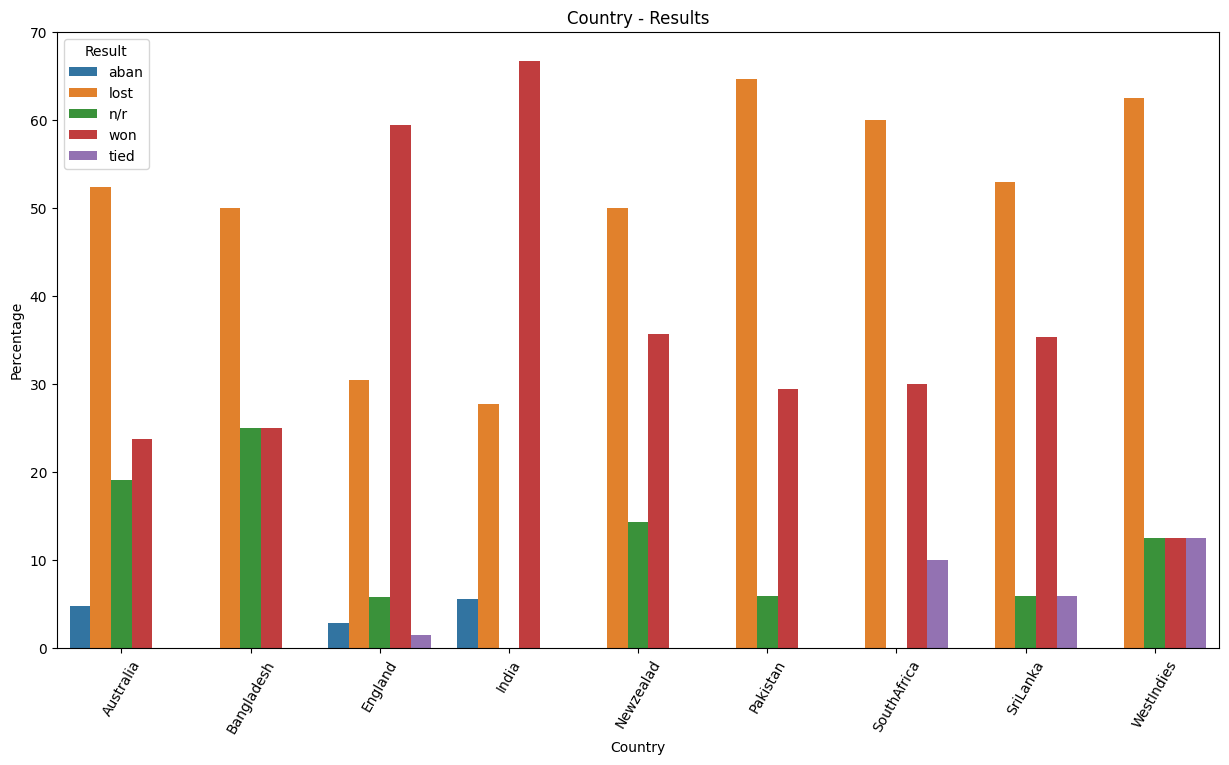

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

Text(0.5, 0, 'England')

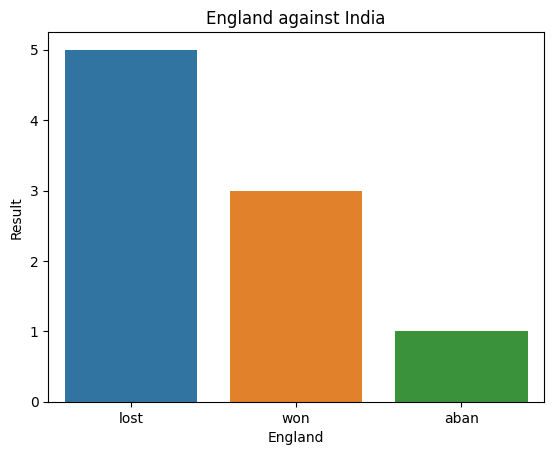

In [34]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

In [35]:
WC_Grounds_History.sample(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
926,956,won,87 runs,NaN,lost,1st,v New Zealand,"Sophia Gardens, Cardiff",6 Jun 2017,ODI # 3880,England,1
94,1107,n/r,-,NaN,won,1st,v New Zealand,"Edgbaston, Birmingham",12 Jun 2013,ODI # 3369,Australia,2
82,699,won,26 runs,NaN,lost,1st,v South Africa,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,India,6
568,912,won,210 runs,NaN,lost,1st,v New Zealand,"Edgbaston, Birmingham",9 Jun 2015,ODI # 3654,England,1
1113,1213,lost,6 wickets,32.0,won,1st,v England,"Riverside Ground, Chester-le-Street",21 Jun 2018,ODI # 4012,Australia,2


In [36]:
battes_df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [37]:
battes_df.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [38]:
battes_df.shape

(11149, 13)

In [40]:
Top_10_batters = battes_df['Batsman'].value_counts()[:10]
Top_10_batters

MS Dhoni             341
Chris Gayle          289
Shoaib Malik         284
Virat Kohli          227
Eoin Morgan          222
Ross Taylor          218
Lasith Malinga       218
Mohammad Hafeez      210
Mashrafe Mortaza     209
Rohit Sharma         206
Name: Batsman, dtype: int64

In [42]:
induvidual_player = battes_df.query('Batsman =="Virat Kohli "')
induvidual_player

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6676,6677,12,12,22,54.54,1,0,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat Kohli,253802
6677,6678,37,37,67,55.22,6,0,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat Kohli,253802
6678,6679,25,25,38,65.78,4,0,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat Kohli,253802
6679,6680,54,54,66,81.81,7,0,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat Kohli,253802
6680,6681,31,31,46,67.39,3,1,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat Kohli,253802
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898,6899,44,44,45,97.77,6,1,v Australia,Hyderabad (Deccan),2 Mar 2019,ODI # 4102,Virat Kohli,253802
6899,6900,116,116,120,96.66,10,0,v Australia,Nagpur,5 Mar 2019,ODI # 4106,Virat Kohli,253802
6900,6901,123,123,95,129.47,16,1,v Australia,Ranchi,8 Mar 2019,ODI # 4109,Virat Kohli,253802
6901,6902,7,7,6,116.66,1,0,v Australia,Mohali,10 Mar 2019,ODI # 4111,Virat Kohli,253802


In [43]:
print("The highest number of score for this batsman is: ")
print(induvidual_player['Runs'].max())
print("The highest Strike Rate for this batsman is: ")
print(induvidual_player['SR'].max())
print("The most number of 4s for this batsman is: ")
print(induvidual_player['4s'].max())
print("The most number of 6s score for this batsman is: ")
print(induvidual_player['6s'].max())

The highest number of score for this batsman is: 
99
The highest Strike Rate for this batsman is: 
99.00
The most number of 4s for this batsman is: 
9
The most number of 6s score for this batsman is: 
7


In [44]:
against_pak = induvidual_player.query('Opposition == "v Pakistan"')
against_pak

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6682,6683,16,16,24,66.66,1,0,v Pakistan,Centurion,26 Sep 2009,ODI # 2898,Virat Kohli,253802
6704,6705,18,18,27,66.66,1,0,v Pakistan,Dambulla,19 Jun 2010,ODI # 2996,Virat Kohli,253802
6728,6729,9,9,21,42.85,0,0,v Pakistan,Mohali,30 Mar 2011,ODI # 3147,Virat Kohli,253802
6760,6761,183,183,148,123.64,22,1,v Pakistan,Dhaka,18 Mar 2012,ODI # 3263,Virat Kohli,253802
6766,6767,0,0,5,0.00,0,0,v Pakistan,Chennai,30 Dec 2012,ODI # 3314,Virat Kohli,253802
6767,6768,6,6,9,66.66,1,0,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,Virat Kohli,253802
6768,6769,7,7,17,41.17,1,0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Virat Kohli,253802
6776,6777,22*,22,27,81.48,3,0,v Pakistan,Birmingham,15 Jun 2013,ODI # 3372,Virat Kohli,253802
6808,6809,5,5,11,45.45,0,0,v Pakistan,Dhaka,2 Mar 2014,ODI # 3479,Virat Kohli,253802
6826,6827,107,107,126,84.92,8,0,v Pakistan,Adelaide,15 Feb 2015,ODI # 3602,Virat Kohli,253802


<BarContainer object of 12 artists>

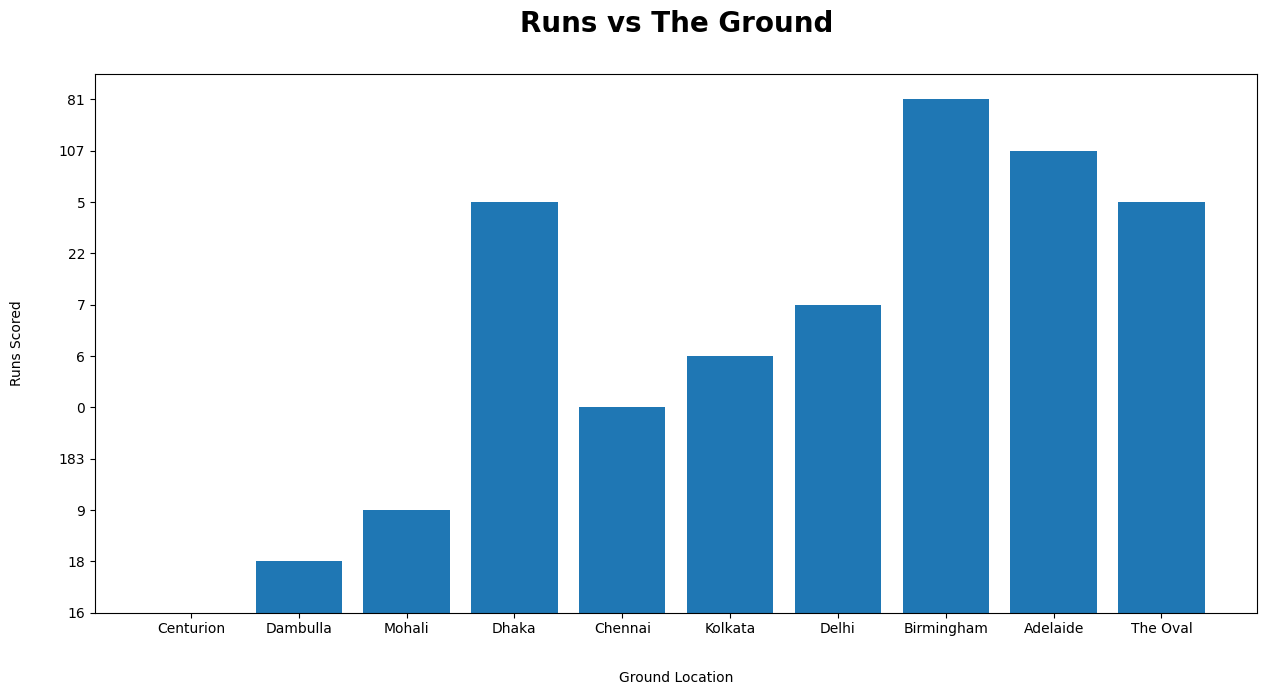

In [45]:
plt.figure(figsize=(15,7))
x = against_pak['Ground']
y = against_pak['Runs']
plt.xlabel('Ground Location', labelpad=25)
plt.ylabel('Runs Scored', labelpad=25)
plt.title('Runs vs The Ground', fontweight='bold', pad=30, fontsize=20)
plt.bar(x, y)

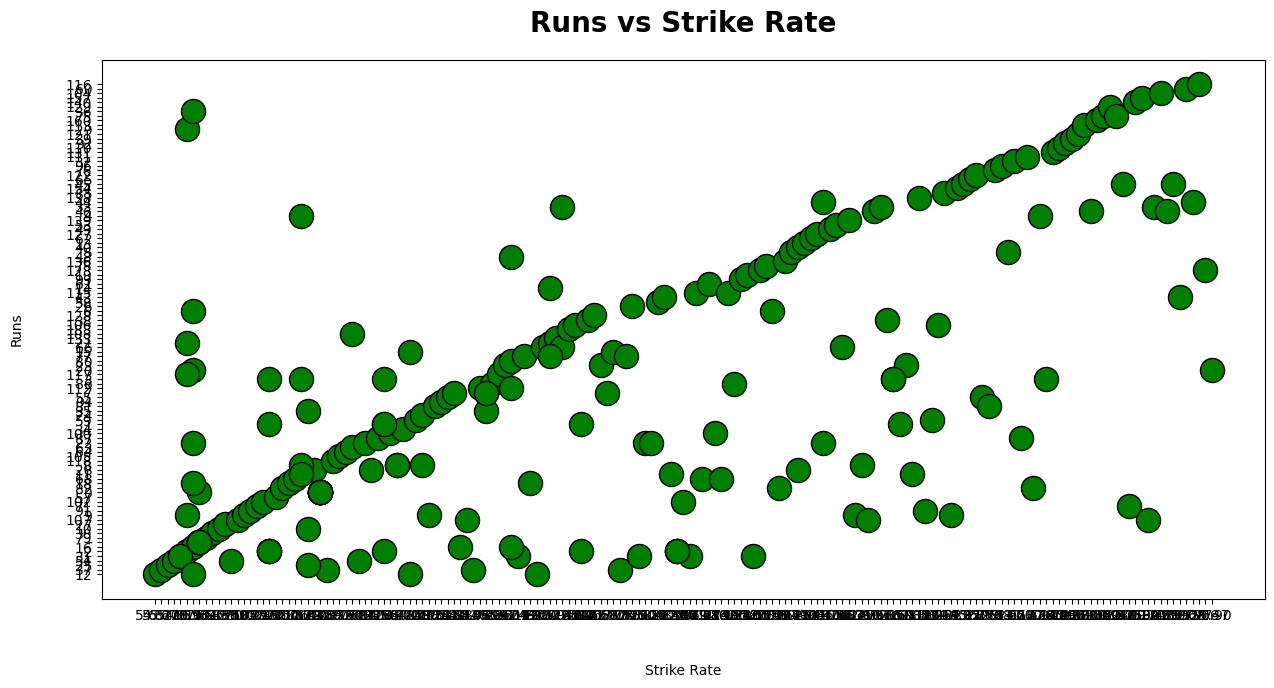

In [48]:
plt.figure(figsize=(15,7))
x = induvidual_player['SR']
y = induvidual_player['Runs']
plt.xlabel('Strike Rate', labelpad=30)
plt.ylabel('Runs', labelpad=30)
plt.title('Runs vs Strike Rate', fontweight='bold', pad=20, fontsize=20)
plt.scatter(x, y, color='green', s=300, edgecolor='black')

In [49]:
bowler_df.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [50]:
bowler_df.drop(bowler_df[bowler_df.Overs == '-'].index, inplace=True)
bowler_df.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0,75,0,7.50,-,-,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619


In [51]:
bowler_df['Mdns'] = bowler_df['Mdns'].str.replace('-', '0')
bowler_df['Runs'] = bowler_df['Runs'].str.replace('-', '0')
bowler_df['Wkts'] = bowler_df['Wkts'].str.replace('-', '0')
bowler_df['Econ'] = bowler_df['Econ'].str.replace('-', '0')
bowler_df['Ave'] = bowler_df['Ave'].str.replace('-', '0')
bowler_df['SR'] = bowler_df['SR'].str.replace('-', '0')

In [52]:
bowler_df['Overs'] = bowler_df['Overs'].astype(float)
bowler_df['Mdns'] = bowler_df['Mdns'].astype(float)
bowler_df['Runs'] = bowler_df['Runs'].astype(float)
bowler_df['Wkts'] = bowler_df['Wkts'].astype(float)
bowler_df['Econ'] = bowler_df['Econ'].astype(float)
bowler_df['Ave'] = bowler_df['Ave'].astype(float)
bowler_df['SR'] = bowler_df['SR'].astype(float)
bowler_df.dtypes

Unnamed: 0      int64
Overs         float64
Mdns          float64
Runs          float64
Wkts          float64
Econ          float64
Ave           float64
SR            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Bowler         object
Player_ID       int64
dtype: object

In [53]:
#Highest Number of Wickets
bowler_df.loc[bowler_df['Wkts']==bowler_df['Wkts'].max()]


,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
2056,2057,9.0,0.0,45.0,7.0,5.00,6.42,7.7,v West Indies,Basseterre,15 Jun 2016,ODI # 3747,Imran Tahir,40618
4933,4934,10.0,3.0,34.0,7.0,3.40,4.85,8.5,v West Indies,Christchurch,23 Dec 2017,ODI # 3944,Trent Boult,277912
5044,5045,9.0,0.0,33.0,7.0,3.66,4.71,7.7,v England,Wellington,20 Feb 2015,ODI # 3607,Tim Southee,232364
11034,11035,8.4,1.0,18.0,7.0,2.07,2.57,7.4,v West Indies,Gros Islet,9 Jun 2017,ODI # 3884,Rashid Khan,793463


In [54]:
#Highest Number of Madiens
bowler_df.loc[bowler_df['Mdns']==bowler_df['Mdns'].max()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
67,68,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Suranga Lakmal,49619
193,194,10.0,4.0,28.0,3.0,2.80,9.33,20.0,v Pakistan,The Oval,7 Jun 2013,ODI # 3364,Kemar Roach,230553
200,201,6.0,4.0,14.0,1.0,2.33,14.00,36.0,v Pakistan,Providence,16 Jul 2013,ODI # 3390,Kemar Roach,230553
867,868,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v Pakistan,Providence,14 Jul 2013,ODI # 3389,Jason Holder,391485
982,983,10.0,4.0,37.0,2.0,3.70,18.50,30.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Nuwan Pradeep,324358
2231,2232,8.0,4.0,19.0,0.0,2.37,0.00,0.0,v Bangladesh,Dhaka,14 Mar 2008,ODI # 2692,Dale Steyn,47492
4952,4953,10.0,4.0,21.0,5.0,2.10,4.20,12.0,v India,Hamilton,31 Jan 2019,ODI # 4091,Trent Boult,277912
5320,5321,9.0,4.0,23.0,1.0,2.55,23.00,54.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Mohammed Shami,481896
5644,5645,8.0,4.0,24.0,2.0,3.00,12.00,24.0,v Sri Lanka,Port of Spain,11 Jul 2013,ODI # 3388,Bhuvneshwar Kumar,326016
9052,9053,10.0,4.0,13.0,1.0,1.30,13.00,60.0,v Scotland,Chattogram,15 Dec 2006,ODI # 2465,Shakib Al Hasan,56143


In [55]:
#Top 20 ballers with highest macthes/data
new = bowler_df['Bowler'].value_counts()[:20]
new

Shoaib Malik         213
Lasith Malinga       212
Mashrafe Mortaza     209
Shakib Al Hasan      195
Chris Gayle          195
Mohammad Hafeez      169
Angelo Mathews       154
Ravindra Jadeja      147
Thisara Perera       144
Tim Southee          137
Mahmudullah          132
JP Duminy            131
Dale Steyn           124
Mohammad Nabi        107
Bhuvneshwar Kumar    104
Imran Tahir           96
Rubel Hossain         95
Jason Holder          93
Moeen Ali             89
Kemar Roach           84
Name: Bowler, dtype: int64

In [58]:
induvidual_bowler = bowler_df.query('Bowler =="Ravindra Jadeja"')
induvidual_bowler

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5383,5384,6.0,0.0,40.0,0.0,6.66,0.00,0.0,v Sri Lanka,Colombo (RPS),8 Feb 2009,ODI # 2818,Ravindra Jadeja,234675
5384,5385,7.0,1.0,34.0,0.0,4.85,0.00,0.0,v West Indies,Kingston,26 Jun 2009,ODI # 2852,Ravindra Jadeja,234675
5385,5386,2.0,0.0,12.0,0.0,6.00,0.00,0.0,v West Indies,Kingston,28 Jun 2009,ODI # 2853,Ravindra Jadeja,234675
5386,5387,9.0,0.0,39.0,1.0,4.33,39.00,54.0,v Australia,Vadodara,25 Oct 2009,ODI # 2913,Ravindra Jadeja,234675
5387,5388,6.3,0.0,35.0,3.0,5.38,11.66,13.0,v Australia,Nagpur,28 Oct 2009,ODI # 2915,Ravindra Jadeja,234675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,5530,9.0,0.0,53.0,0.0,5.88,0.00,0.0,v Australia,Melbourne,18 Jan 2019,ODI # 4079,Ravindra Jadeja,234675
5530,5531,10.0,0.0,33.0,0.0,3.30,0.00,0.0,v Australia,Hyderabad (Deccan),2 Mar 2019,ODI # 4102,Ravindra Jadeja,234675
5531,5532,10.0,0.0,48.0,1.0,4.80,48.00,60.0,v Australia,Nagpur,5 Mar 2019,ODI # 4106,Ravindra Jadeja,234675
5532,5533,10.0,0.0,64.0,0.0,6.40,0.00,0.0,v Australia,Ranchi,8 Mar 2019,ODI # 4109,Ravindra Jadeja,234675


In [59]:
#Storing the data into variables
x = induvidual_bowler['Overs']
y1 = induvidual_bowler['Mdns']
y2 = induvidual_bowler['Runs']
y3 = induvidual_bowler['Wkts']
y4 = induvidual_bowler['Econ']
y5 = induvidual_bowler['Ave']
y6 = induvidual_bowler['SR']

Text(0.5, 1.0, 'Overs vs Strike Rate of bowlers')

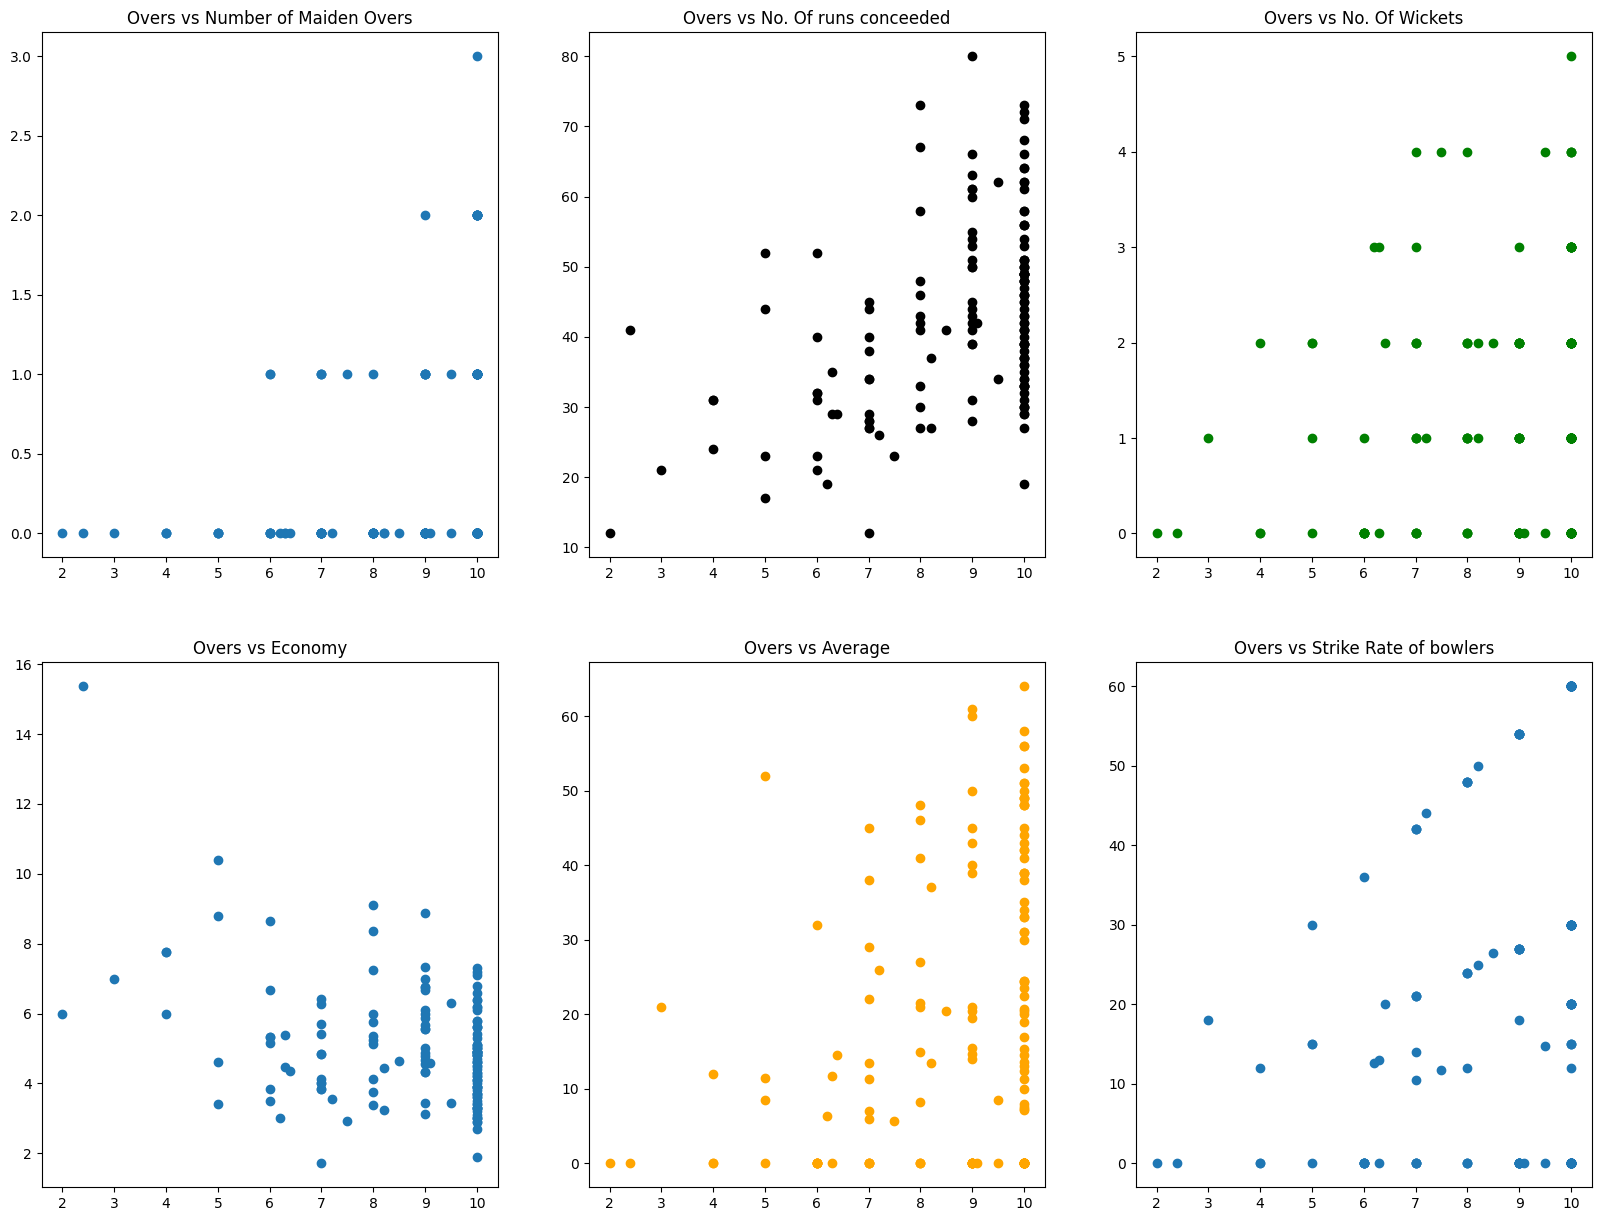

In [60]:
#Plotting the varuous graphs with Overs as X axis to understand the complete performance of a bowler
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
ax1.scatter(x, y1)
ax1.set_title('Overs vs Number of Maiden Overs')
ax2.scatter(x, y2, color='black')
ax2.set_title('Overs vs No. Of runs conceeded')
ax3.scatter(x, y3, color='green')
ax3.set_title('Overs vs No. Of Wickets')
ax4.scatter(x, y4)
ax4.set_title('Overs vs Economy')
ax5.scatter(x, y5, color='orange')
ax5.set_title('Overs vs Average')
ax6.scatter(x, y6)
ax6.set_title('Overs vs Strike Rate of bowlers')

In [61]:
#Gathering Data of one opponent induvidually
bdf_induvidual_opponence = induvidual_bowler.query('Opposition =="v Pakistan"')
bdf_induvidual_opponence

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5410,5411,10.0,0.0,43.0,1.0,4.30,43.00,60.0,v Pakistan,Dambulla,19 Jun 2010,ODI # 2996,Ravindra Jadeja,234675
5441,5442,10.0,1.0,41.0,3.0,4.10,13.66,20.0,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,Ravindra Jadeja,234675
5442,5443,10.0,2.0,19.0,1.0,1.90,19.00,60.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Ravindra Jadeja,234675
5450,5451,8.0,1.0,30.0,2.0,3.75,15.00,24.0,v Pakistan,Birmingham,15 Jun 2013,ODI # 3372,Ravindra Jadeja,234675
5482,5483,10.0,1.0,61.0,0.0,6.10,0.00,0.0,v Pakistan,Dhaka,2 Mar 2014,ODI # 3479,Ravindra Jadeja,234675
5494,5495,10.0,0.0,56.0,1.0,5.60,56.00,60.0,v Pakistan,Adelaide,15 Feb 2015,ODI # 3602,Ravindra Jadeja,234675
5512,5513,8.0,0.0,43.0,2.0,5.37,21.50,24.0,v Pakistan,Birmingham,4 Jun 2017,ODI # 3878,Ravindra Jadeja,234675
5516,5517,8.0,0.0,67.0,0.0,8.37,0.00,0.0,v Pakistan,The Oval,18 Jun 2017,ODI # 3894,Ravindra Jadeja,234675
5520,5521,9.0,0.0,50.0,0.0,5.55,0.00,0.0,v Pakistan,Dubai (DSC),23 Sep 2018,ODI # 4044,Ravindra Jadeja,234675
